<a href="https://colab.research.google.com/github/hs0224/a-professor-student-research-club/blob/SeoungMinHwang/workspace/sneakers_classification/sneakers_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision.all import *

class DataLoaders(GetAttr):
  def __init__(self, *loaders): self.loaders = loaders
  def __getitem__(self, i): return self.loaders[i]
  train,valid = add_props(lambda i,self: self[i])

In [ ]:
sneakers = DataBlock(blocks=(ImageBlock, CategoryBlock),
                     get_items=get_image_files,
                     splitter=RandomSplitter(valid_pct=0.2, seed=42),
                     get_y=parent_label,
                     item_tfms=Resize(128))

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = '/content/gdrive/My Drive/fastai&PyTorch/sneakers_classification/data_set'
dls = sneakers.dataloaders(path)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4363 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4453 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4369 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4361 missing from current font.
  font.set_text(s

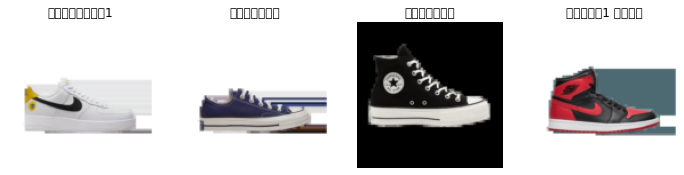

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

이미지의 빈곳을 0(검정색)으로 채움

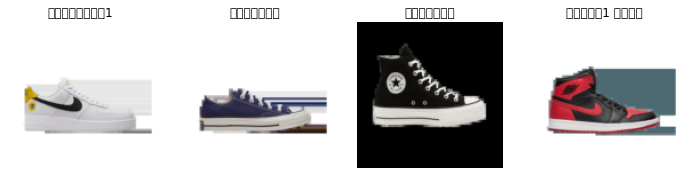

In [ ]:
sneakers = sneakers.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = sneakers.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

이미지의 특정 부분을 무작위로 선택하여 잘라내는 방식

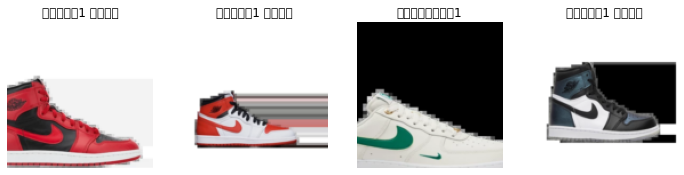

In [ ]:
sneakers = sneakers.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = sneakers.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1)

데이터 증강

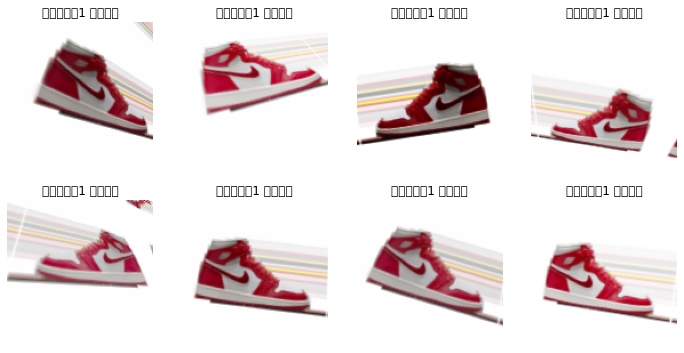

In [ ]:
sneakers = sneakers.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = sneakers.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

모델 훈련과 훈련된 모델을 이용한 데이터 정리

In [ ]:
sneakers = sneakers.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
                        batch_tfms=aug_transforms())
dls = sneakers.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.829194,1.014773,0.366667,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.748572,0.592403,0.266667,00:04
1,0.543972,0.455416,0.122222,00:06
2,0.458011,0.417378,0.111111,00:04
3,0.377142,0.387895,0.100000,00:04


오차 행렬

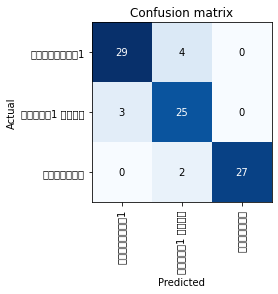

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

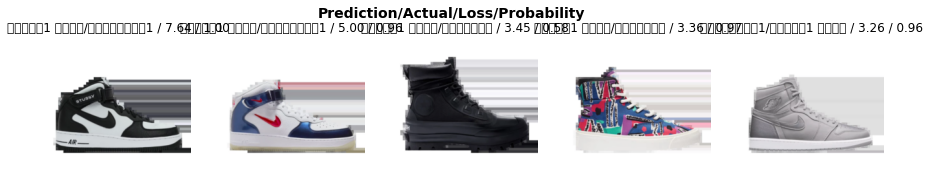

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
from fastai.vision.widgets import ImageClassifierCleaner
cleaner = ImageClassifierCleaner(learn)
cleaner

모델 export()

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('/content/gdrive/My Drive/fastai&PyTorch/sneakers_classification/data_set/에어포스1/1.png')

('에어포스1', TensorBase(0), TensorBase([9.9986e-01, 3.1640e-05, 1.0350e-04]))

In [ ]:
learn_inf.dls.vocab

['에어포스1', '조던1 하이', '컨버스']

In [ ]:
import ipywidgets as widgets

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Preobabillity: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: 조던1 하이; Preobabillity: 0.7711')

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128,128))
  pred,pred_idx,probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Preobabillity: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
from ipywidgets import *

In [ ]:
VBox([widgets.Label('Select your sneakers'),
      btn_upload, btn_run, out_pl, lbl_pred])